__From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.__

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = sns.load_dataset('iris',index_col=0)
df

,sepal_width,petal_length,petal_width,species
sepal_length,,,,
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
...,...,...,...,...
6.7,3.0,5.2,2.3,virginica
6.3,2.5,5.0,1.9,virginica
6.5,3.0,5.2,2.0,virginica


# Exploratory Data Analysis

In [3]:
df.head()

,sepal_width,petal_length,petal_width,species
sepal_length,,,,
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal_width,petal_length,petal_width,species
sepal_length,,,,
6.7,3.0,5.2,2.3,virginica
6.3,2.5,5.0,1.9,virginica
6.5,3.0,5.2,2.0,virginica
6.2,3.4,5.4,2.3,virginica
5.9,3.0,5.1,1.8,virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 150 entries, 5.1 to 5.9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_width   150 non-null    float64
 1   petal_length  150 non-null    float64
 2   petal_width   150 non-null    float64
 3   species       150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


In [6]:
df.describe()

,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000
mean,3.057333,3.758000,1.199333
std,0.435866,1.765298,0.762238
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.350000,1.300000
75%,3.300000,5.100000,1.800000
max,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization &. Corelation Matrix

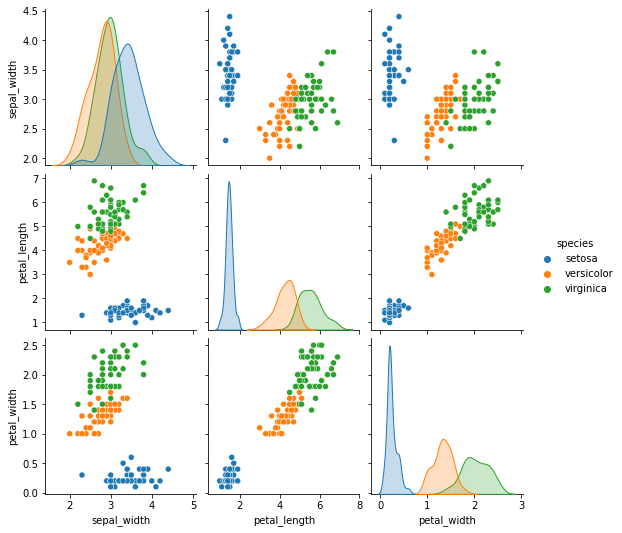

In [8]:
sns.pairplot(df, hue = 'species')

__Correlation Matrix__

In [9]:
df.corr()

,sepal_width,petal_length,petal_width
sepal_width,1.000000,-0.428440,-0.366126
petal_length,-0.428440,1.000000,0.962865
petal_width,-0.366126,0.962865,1.000000


<AxesSubplot:>

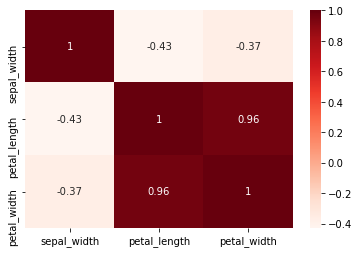

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='Reds')

__Data Preprocessing__

In [11]:
target = df['species']
data=df.copy()
data = data.drop('species',axis=1)
data.shape


(150, 3)

In [15]:
X=df.iloc[:,[0,1,2,3]].values
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
y=df['species'].values
df.shape

(150, 4)

# Training The Model

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training split:",X_train.shape)
print("Test Split:",X_test.shape)

Training split: (120, 4)
Test Split: (30, 4)


In [17]:
tree = DecisionTreeClassifier()
tree
tree.fit(X_train,y_train)

DecisionTreeClassifier()

# Classification Report,Confusion Matrix,Accuracy Score

> __Classification Report__

In [18]:
y_pred=tree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



> __Accuracy Score__

In [19]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


>  __Confusion Matrix__

In [20]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# Visualization of Trained Model

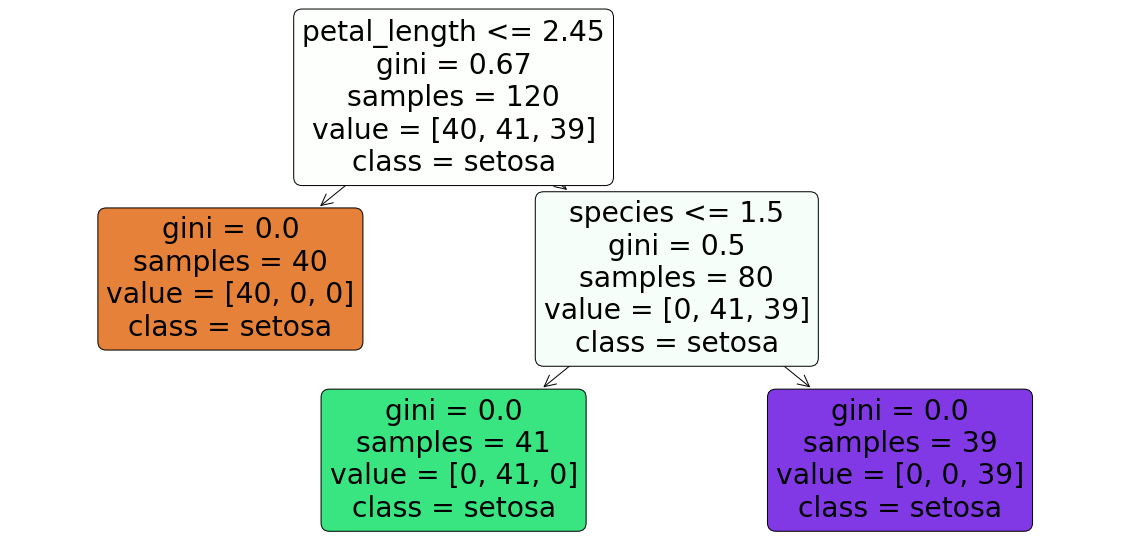

In [21]:
mt.figure(figsize=(20,10))
tree=plot_tree(tree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)
